In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load the dataset ---
df = pd.read_csv("../../data/csv/cleaned_fix.csv")  # Replace with your actual path

# --- Sanity check: confirm required columns exist ---
required_cols = {'Participant', 'Image', 'Scene', 'FixDur', 'Name'}
if not required_cols.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_cols - set(df.columns)}")

# --- Group by Participant and Image, then sum FixDur to get total viewing time ---
viewing_times = df.groupby(['Participant', 'Image', 'Scene', 'experience', 'Name'])['FixDur'].sum().reset_index()

# --- Optional: rename column for clarity ---
viewing_times.rename(columns={'FixDur': 'TotalViewTime'}, inplace=True)

# --- Display result ---
print(viewing_times)

      Participant  Image  Scene experience             Name  TotalViewTime
0             2.0      1      1    Control       Back_chair         1279.0
1             2.0      1      1    Control        Back_wall        14148.0
2             2.0      1      1    Control             Body         6547.0
3             2.0      1      1    Control         Bookcase         2585.0
4             2.0      1      1    Control  Bottle_on_table         1212.0
...           ...    ...    ...        ...              ...            ...
3605       9008.0      2      3    Control       Right_fork          771.0
3606       9008.0      2      3    Control        Right_jar         1163.0
3607       9008.0      2      3    Control      Right_plate         3915.0
3608       9008.0      2      3    Control       Right_sofa         2167.0
3609       9008.0      2      3    Control            Table         2573.0

[3610 rows x 6 columns]


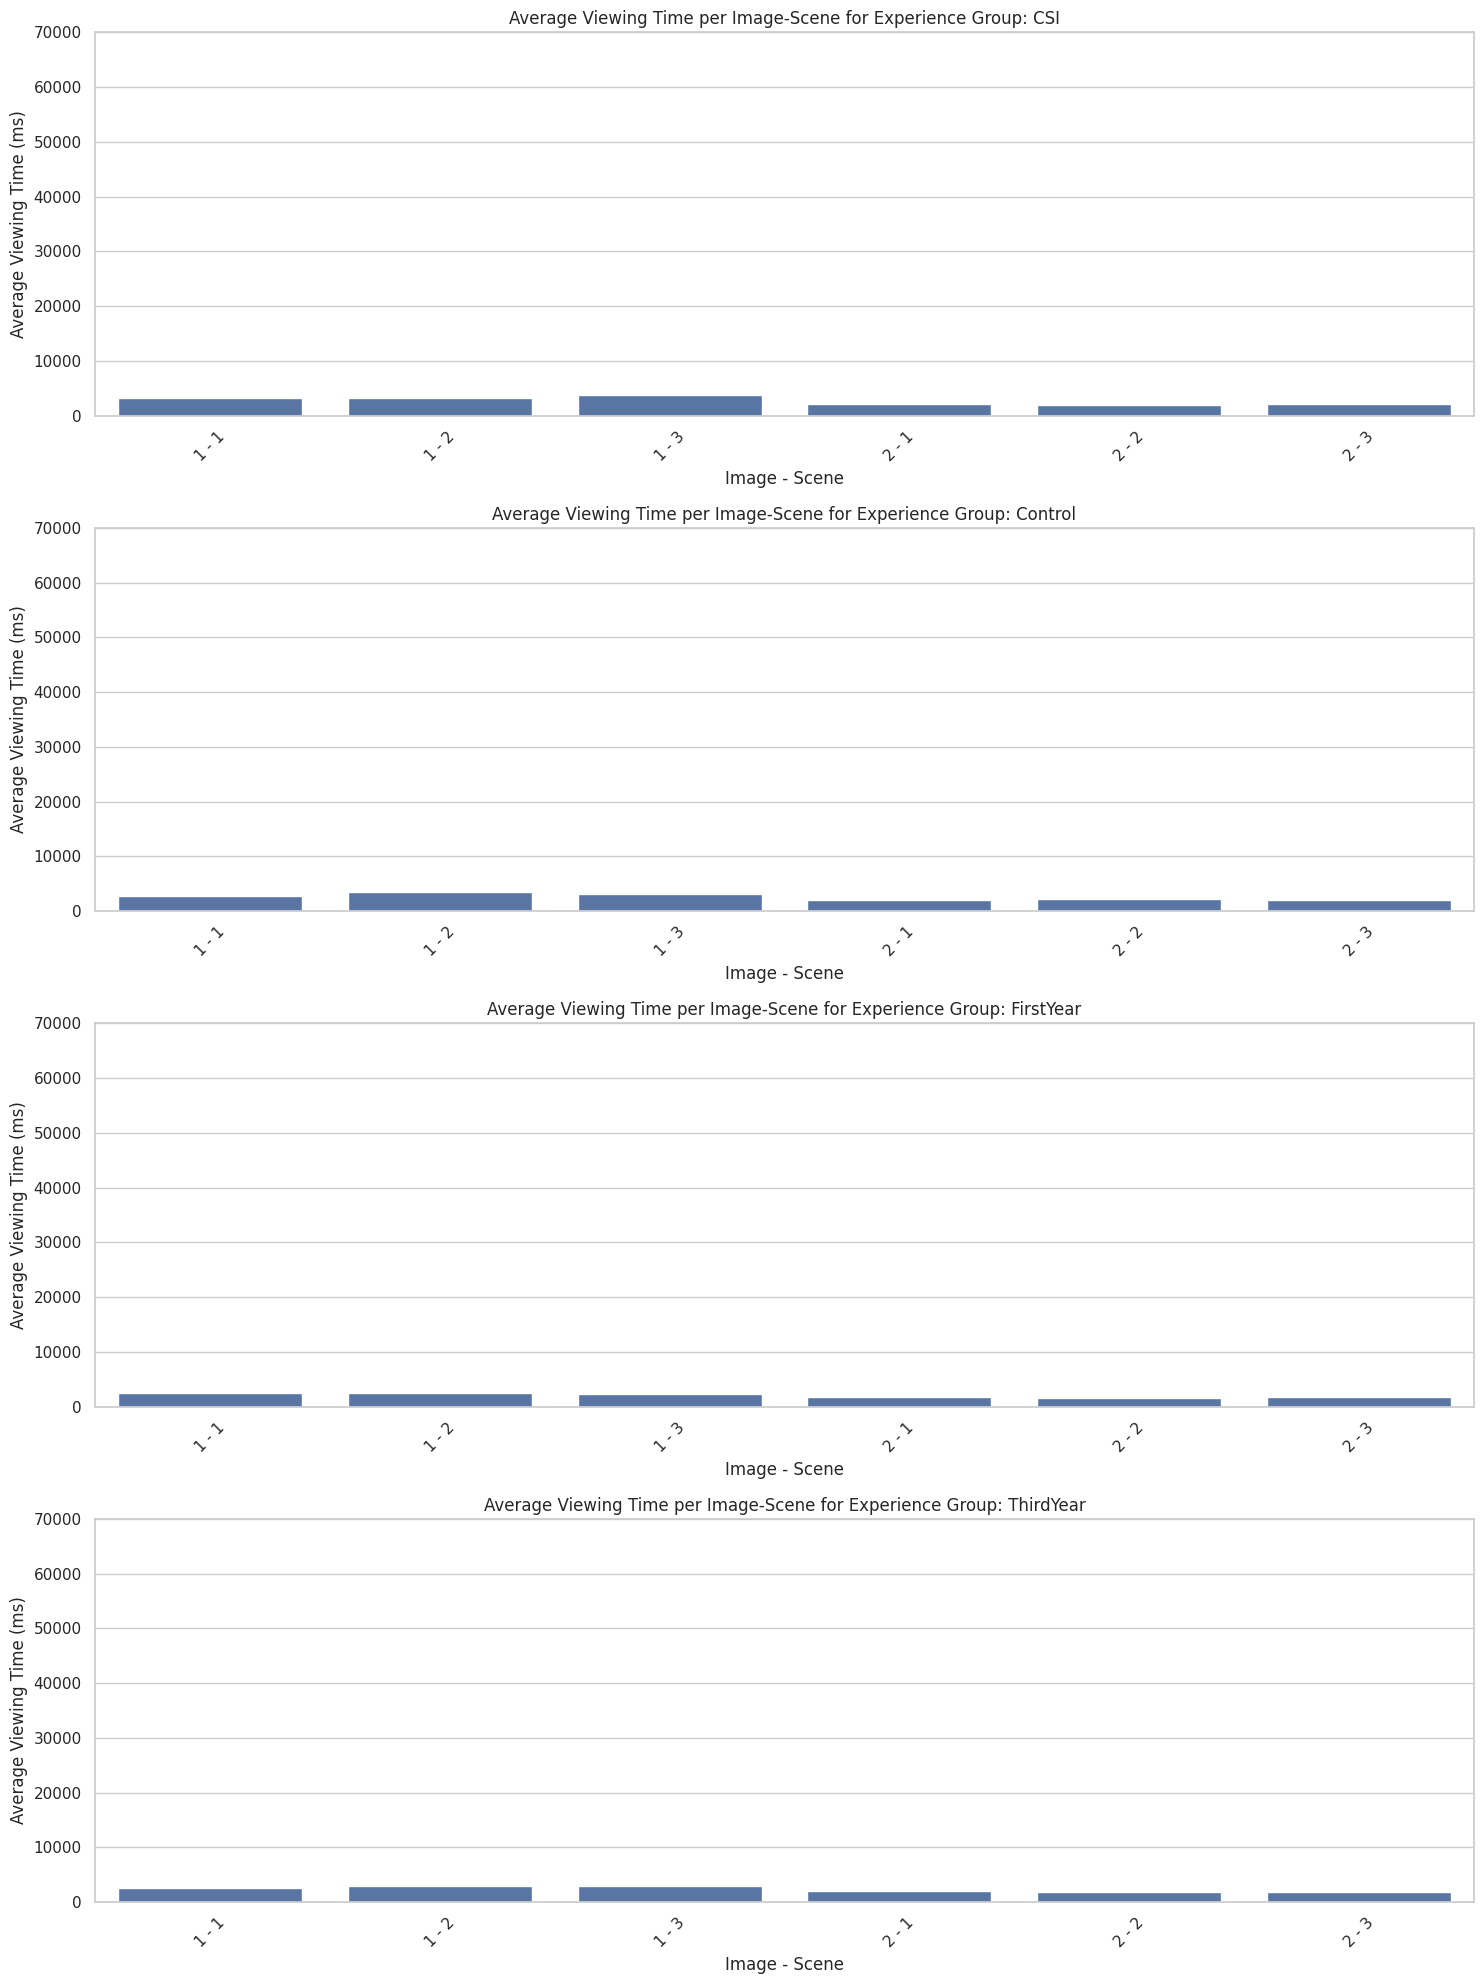

In [2]:
# --- Group by experience, image, and scene ---
avg_view_times = viewing_times.groupby(['experience', 'Image', 'Scene'])['TotalViewTime'].mean().reset_index()

# --- Create a combined column for Image-Scene for clarity in plots ---
avg_view_times['ImageScene'] = avg_view_times['Image'].astype(str) + " - " + avg_view_times['Scene'].astype(str)

# --- Plot per experience group ---
experience_groups = avg_view_times['experience'].unique()

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5 * len(experience_groups)))

for i, group in enumerate(experience_groups):
    plt.subplot(len(experience_groups), 1, i + 1)
    group_data = avg_view_times[avg_view_times['experience'] == group]
    
    sns.barplot(data=group_data, x='ImageScene', y='TotalViewTime')
    plt.title(f'Average Viewing Time per Image-Scene for Experience Group: {group}')
    plt.xlabel('Image - Scene')
    plt.ylabel('Average Viewing Time (ms)')
    plt.xticks(rotation=45)
    plt.ylim(0, 70000)


plt.tight_layout()
plt.show()


In [3]:
# --- Sanity check: confirm required columns exist ---
required_cols = {'Participant', 'Name', 'FixDur'}
if not required_cols.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_cols - set(df.columns)}")

# --- Group by Participant and Image, then sum FixDur to get total viewing time ---
total_viewing_times = df.groupby(['Participant', 'Name', 'experience'])['FixDur'].sum().reset_index()

# --- Optional: rename column for clarity ---
total_viewing_times.rename(columns={'FixDur': 'TotalViewTime'}, inplace=True)

# --- Display result ---
print(total_viewing_times)

      Participant              Name experience  TotalViewTime
0             2.0        Back_chair    Control         1279.0
1             2.0         Back_wall    Control        33384.0
2             2.0               Bed    Control         6114.0
3             2.0          Bed_left    Control         3421.0
4             2.0    Bed_sheet_left    Control          607.0
...           ...               ...        ...            ...
2578       9008.0  Wall_near_stairs    Control          689.0
2579       9008.0     Wall_on_right    Control         1155.0
2580       9008.0   Wall_to_kitchen    Control         2213.0
2581       9008.0           Windows    Control         1962.0
2582       9008.0       Wooden_wall    Control          720.0

[2583 rows x 4 columns]


In [4]:
print(viewing_times)

      Participant  Image  Scene experience             Name  TotalViewTime
0             2.0      1      1    Control       Back_chair         1279.0
1             2.0      1      1    Control        Back_wall        14148.0
2             2.0      1      1    Control             Body         6547.0
3             2.0      1      1    Control         Bookcase         2585.0
4             2.0      1      1    Control  Bottle_on_table         1212.0
...           ...    ...    ...        ...              ...            ...
3605       9008.0      2      3    Control       Right_fork          771.0
3606       9008.0      2      3    Control        Right_jar         1163.0
3607       9008.0      2      3    Control      Right_plate         3915.0
3608       9008.0      2      3    Control       Right_sofa         2167.0
3609       9008.0      2      3    Control            Table         2573.0

[3610 rows x 6 columns]


/tmp/ipykernel_8715/2967330914.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data.sort_values(by=['TotalViewTime'], ascending=False, inplace=True)
/tmp/ipykernel_8715/2967330914.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data.sort_values(by=['TotalViewTime'], ascending=False, inplace=True)
/tmp/ipykernel_8715/2967330914.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data.sort_values(by=['TotalVi

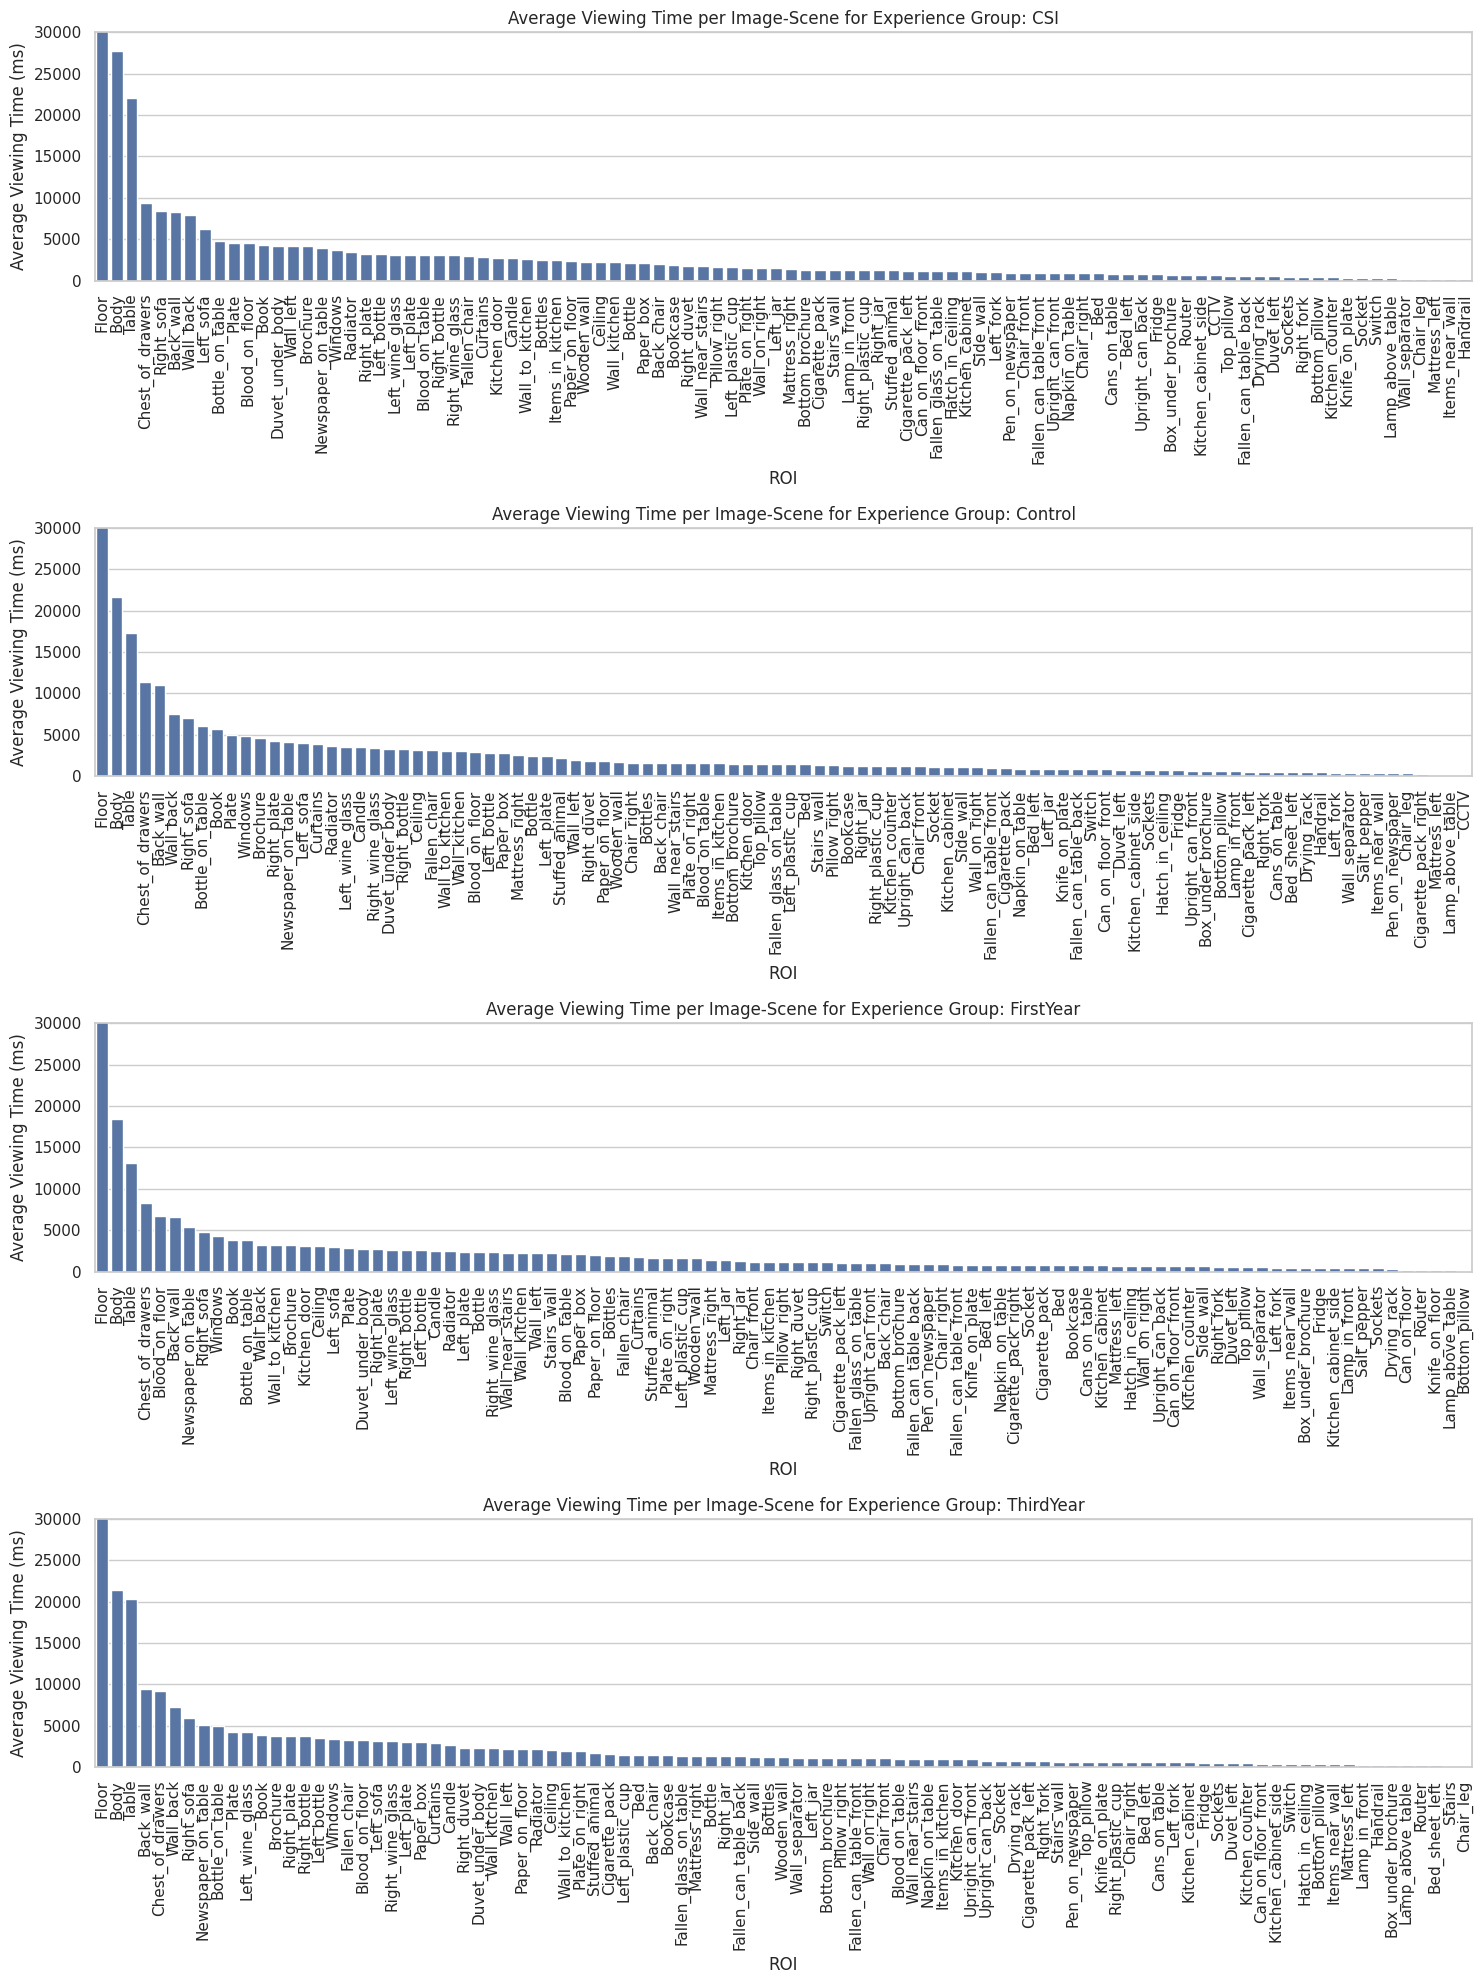

In [5]:
# --- Group by experience, image, and scene ---
avg_view_times = total_viewing_times.groupby(['experience', 'Name'])['TotalViewTime'].mean().reset_index()

# --- Plot per experience group ---
experience_groups = avg_view_times['experience'].unique()

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5 * len(experience_groups)))

for i, group in enumerate(experience_groups):
    plt.subplot(len(experience_groups), 1, i + 1)
    group_data = avg_view_times[avg_view_times['experience'] == group]
    group_data.sort_values(by=['TotalViewTime'], ascending=False, inplace=True)
    sns.barplot(data=group_data, x='Name', y='TotalViewTime')
    plt.title(f'Average Viewing Time per Image-Scene for Experience Group: {group}')
    plt.xlabel('ROI')
    plt.ylabel('Average Viewing Time (ms)')
    plt.xticks(rotation=90)
    plt.ylim(0, 30000)


plt.tight_layout()
plt.show()


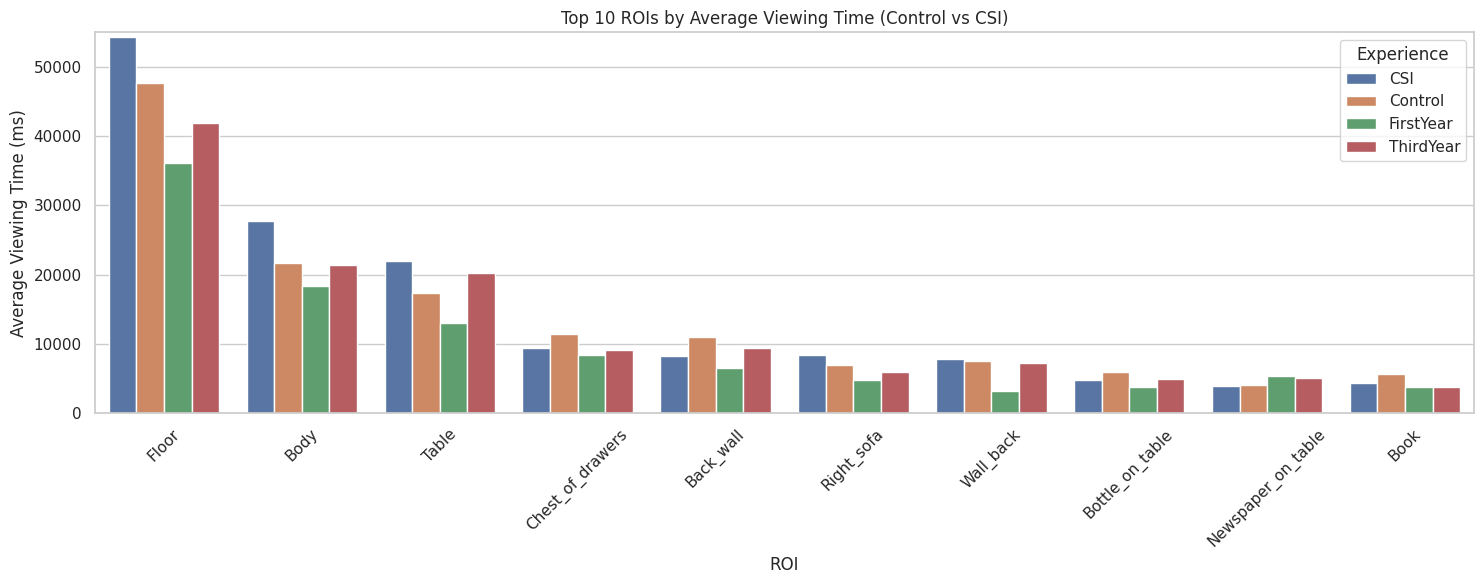

In [6]:
# --- Step 1: Group by experience and ROI (Name) ---
avg_view_times = total_viewing_times.groupby(['experience', 'Name'])['TotalViewTime'].mean().reset_index()

# --- Step 2: Compute average across experiences to get top 10 ROIs overall ---
top_rois = (
    avg_view_times.groupby('Name')['TotalViewTime']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# --- Step 3: Filter the data for only those top 10 ROIs ---
filtered_data = avg_view_times[avg_view_times['Name'].isin(top_rois)]

# --- Step 4: Plot single bar chart with hue for experience ---
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
order = top_rois
sns.barplot(data=filtered_data, x='Name', y='TotalViewTime', hue='experience', order=order)

plt.title('Top 10 ROIs by Average Viewing Time (Control vs CSI)')
plt.xlabel('ROI')
plt.ylabel('Average Viewing Time (ms)')
plt.xticks(rotation=45)
plt.ylim(0, 55000)
plt.legend(title='Experience')

plt.tight_layout()
plt.show()


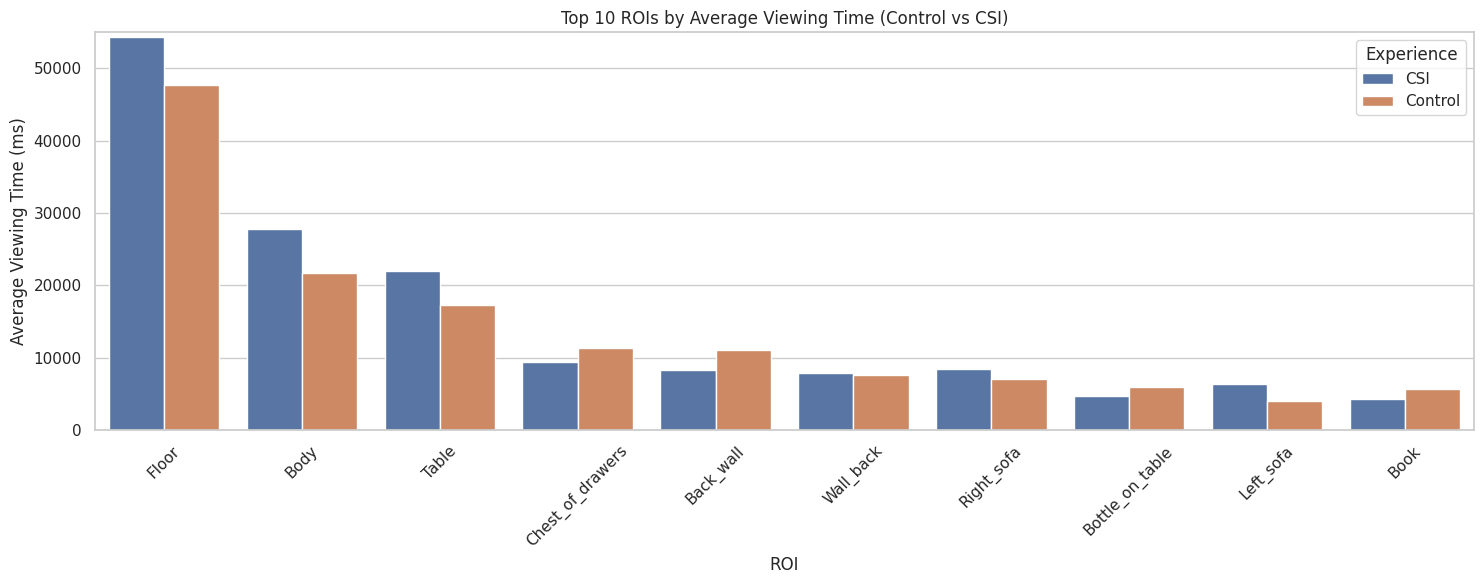

In [7]:
# --- Step 1: Group by experience and ROI (Name) ---
avg_view_times = total_viewing_times.groupby(['experience', 'Name'])['TotalViewTime'].mean().reset_index()

# --- Step 2: Filter for only the desired experience groups ---
selected_groups = ['Control', 'CSI']
filtered_avg = avg_view_times[avg_view_times['experience'].isin(selected_groups)]

# --- Step 3: Get top 10 ROIs based on average across the selected groups ---
top_rois = (
    filtered_avg.groupby('Name')['TotalViewTime']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# --- Step 4: Filter again to include only top 10 ROIs ---
filtered_data = filtered_avg[filtered_avg['Name'].isin(top_rois)]

# --- Step 5: Plot ---
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
order = top_rois
sns.barplot(data=filtered_data, x='Name', y='TotalViewTime', hue='experience', order=order)

plt.title('Top 10 ROIs by Average Viewing Time (Control vs CSI)')
plt.xlabel('ROI')
plt.ylabel('Average Viewing Time (ms)')
plt.xticks(rotation=45)
plt.ylim(0, 55000)
plt.legend(title='Experience')

plt.tight_layout()
plt.show()


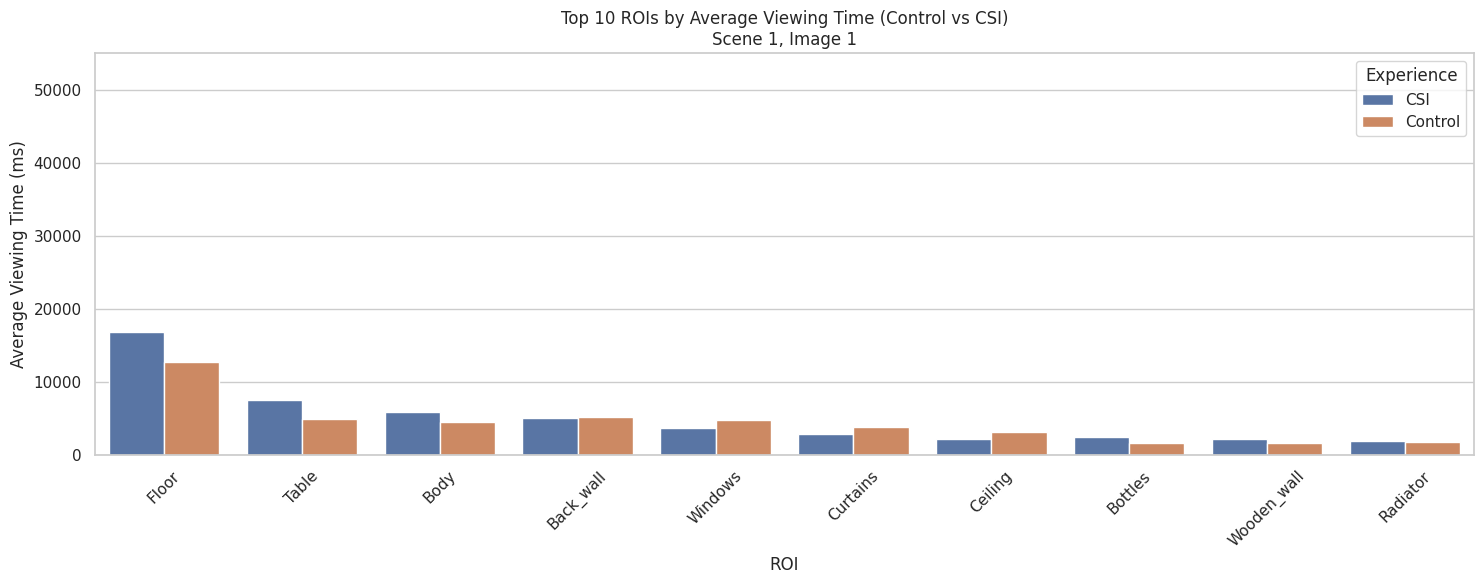

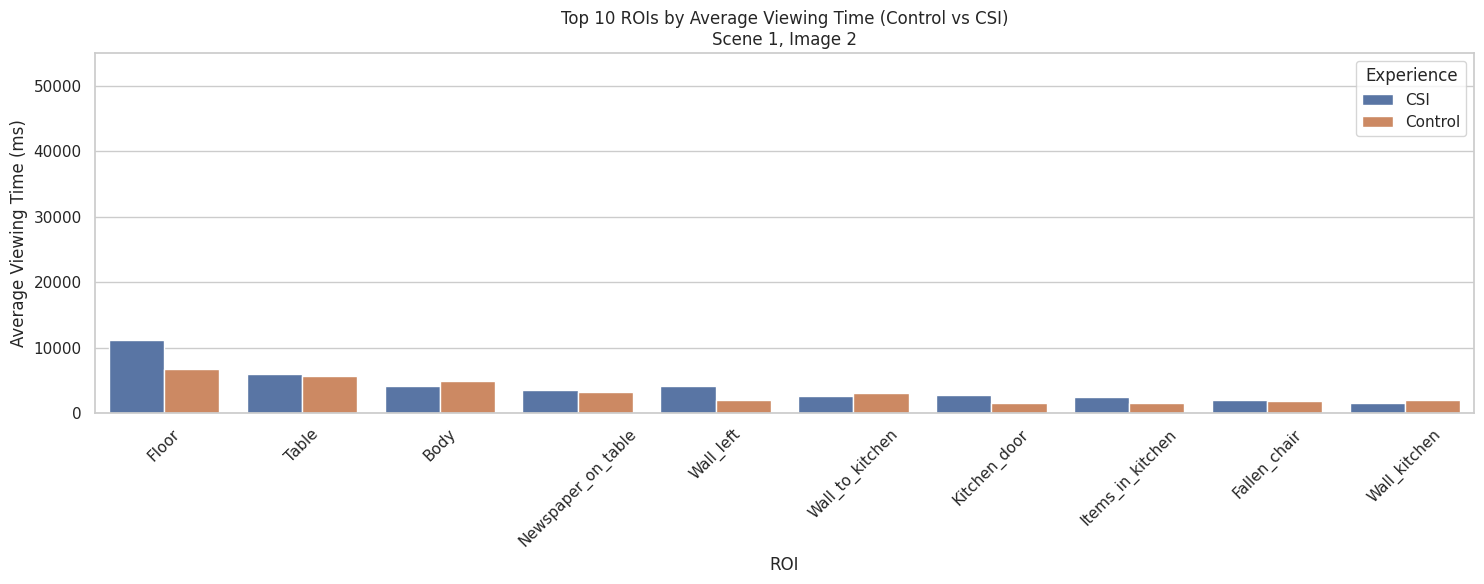

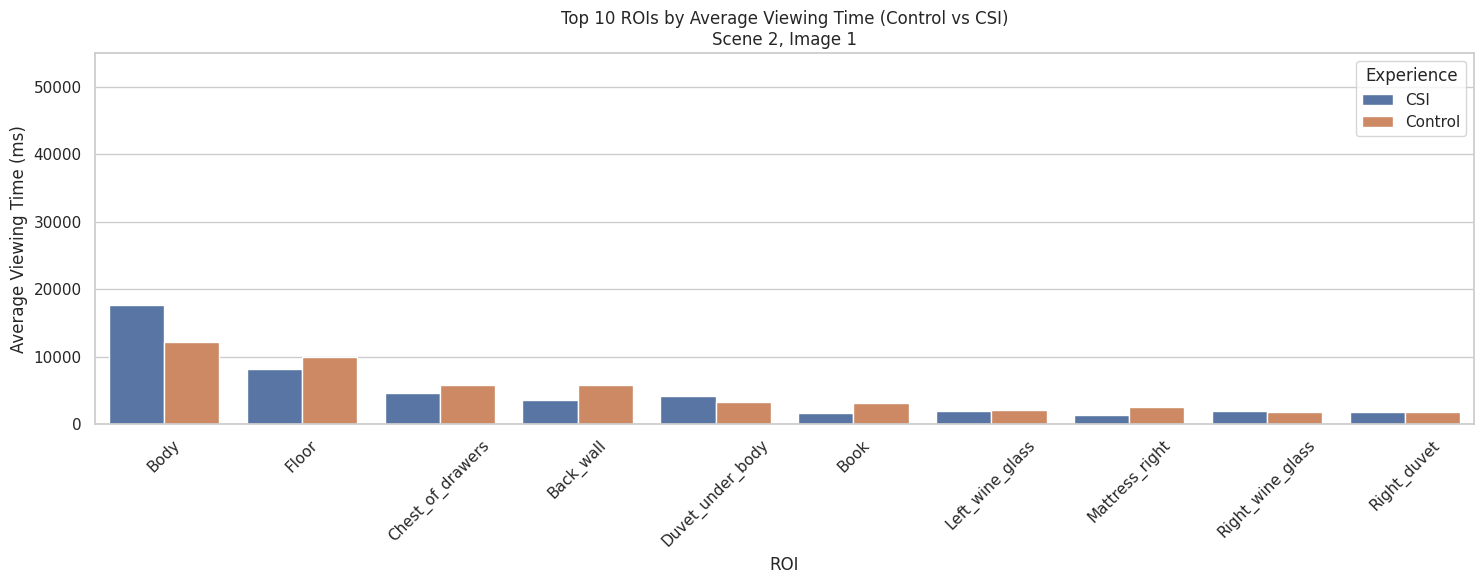

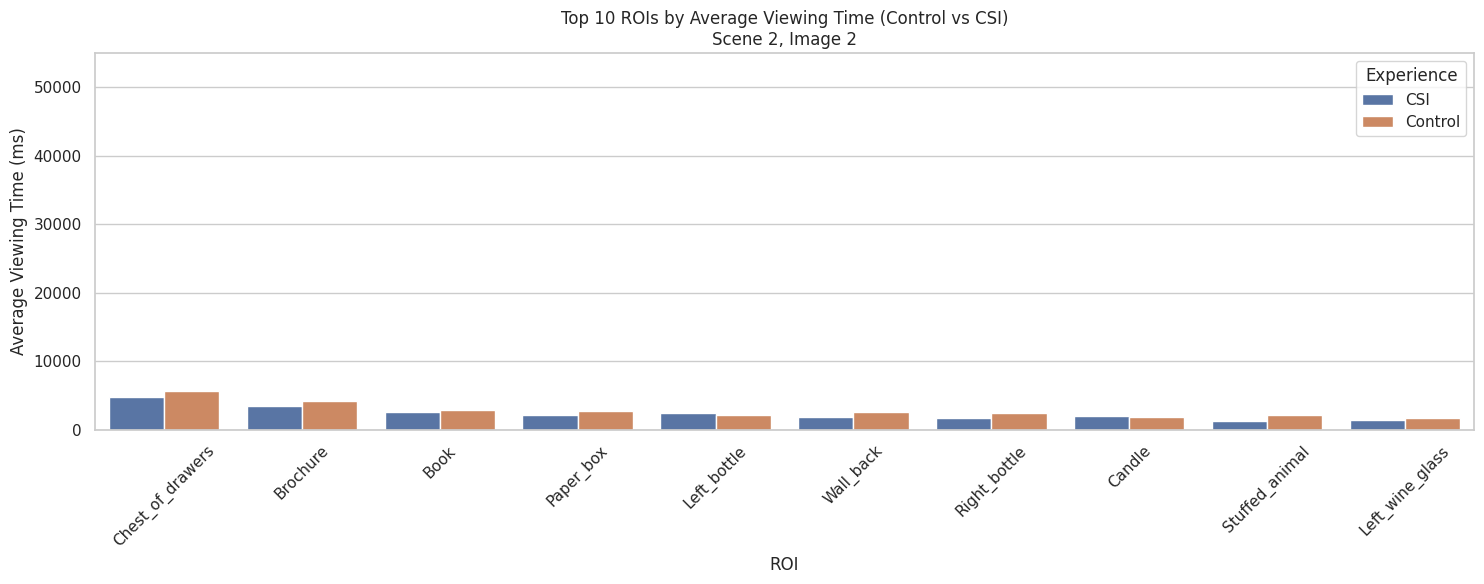

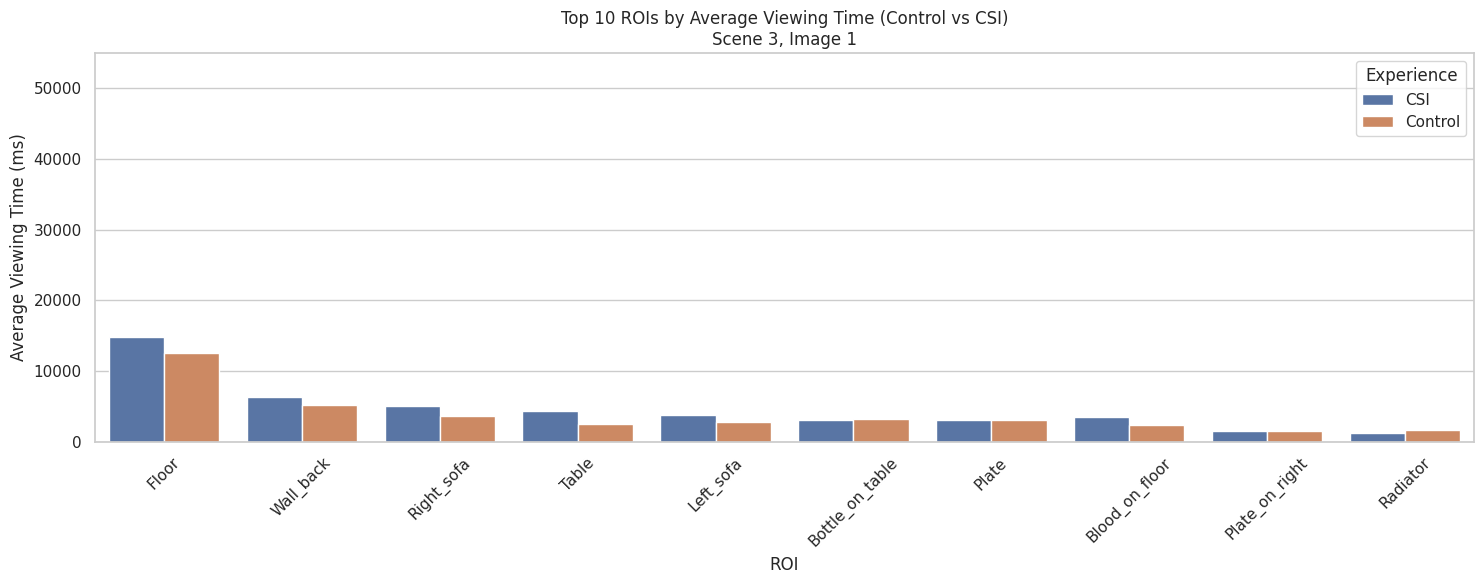

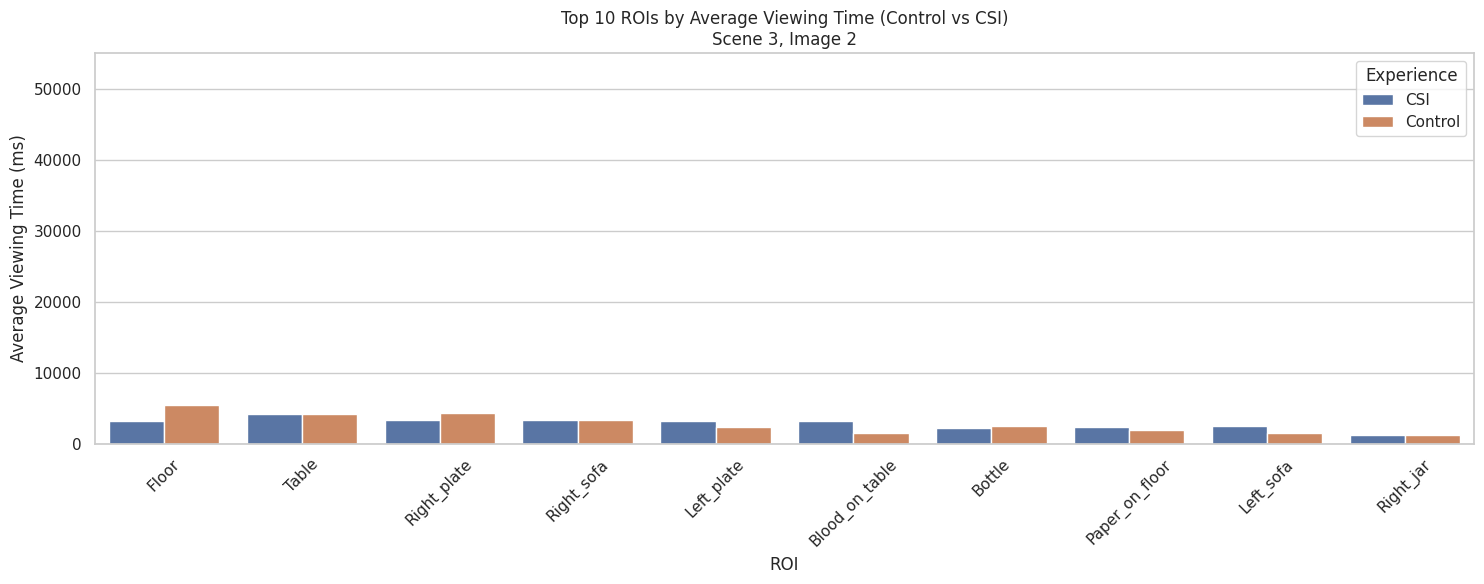

In [10]:
# Loop through each scene and image combination
for scene in range(1, 4):  # Scenes 1 to 3
    for image in range(1, 3):  # Images 1 to 2

        # --- Step 0: Filter for current scene and image ---
        viewing_time_image_scene = viewing_times[
            (viewing_times['Scene'] == scene) & (viewing_times['Image'] == image)
        ]

        # --- Step 1: Group by experience and ROI (Name) ---
        avg_view_times = viewing_time_image_scene.groupby(['experience', 'Name'])['TotalViewTime'].mean().reset_index()

        # --- Step 2: Filter for only the desired experience groups ---
        selected_groups = ['Control', 'CSI']
        filtered_avg = avg_view_times[avg_view_times['experience'].isin(selected_groups)]

        # --- Step 3: Get top 10 ROIs based on average across the selected groups ---
        top_rois = (
            filtered_avg.groupby('Name')['TotalViewTime']
            .mean()
            .sort_values(ascending=False)
            .head(10)
            .index
        )

        # --- Step 4: Filter again to include only top 10 ROIs ---
        filtered_data = filtered_avg[filtered_avg['Name'].isin(top_rois)]

        # --- Step 5: Plot ---
        sns.set(style="whitegrid")
        plt.figure(figsize=(15, 6))
        order = top_rois
        sns.barplot(data=filtered_data, x='Name', y='TotalViewTime', hue='experience', order=order)

        plt.title(f'Top 10 ROIs by Average Viewing Time (Control vs CSI)\nScene {scene}, Image {image}')
        plt.xlabel('ROI')
        plt.ylabel('Average Viewing Time (ms)')
        plt.xticks(rotation=45)
        plt.ylim(0, 55000)
        plt.legend(title='Experience')

        plt.tight_layout()
        plt.show()


/tmp/ipykernel_8715/1172994509.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['TotalViewTimePercent'] = filtered_data.groupby('experience')['TotalViewTime'].transform(


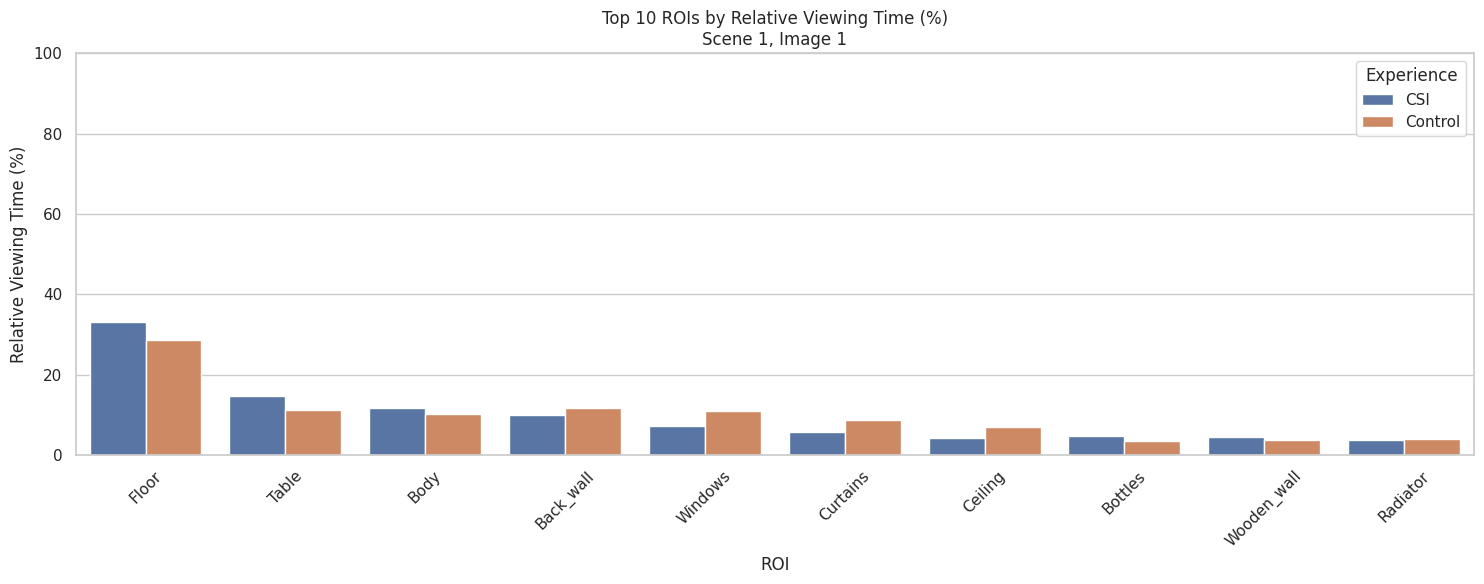

/tmp/ipykernel_8715/1172994509.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['TotalViewTimePercent'] = filtered_data.groupby('experience')['TotalViewTime'].transform(


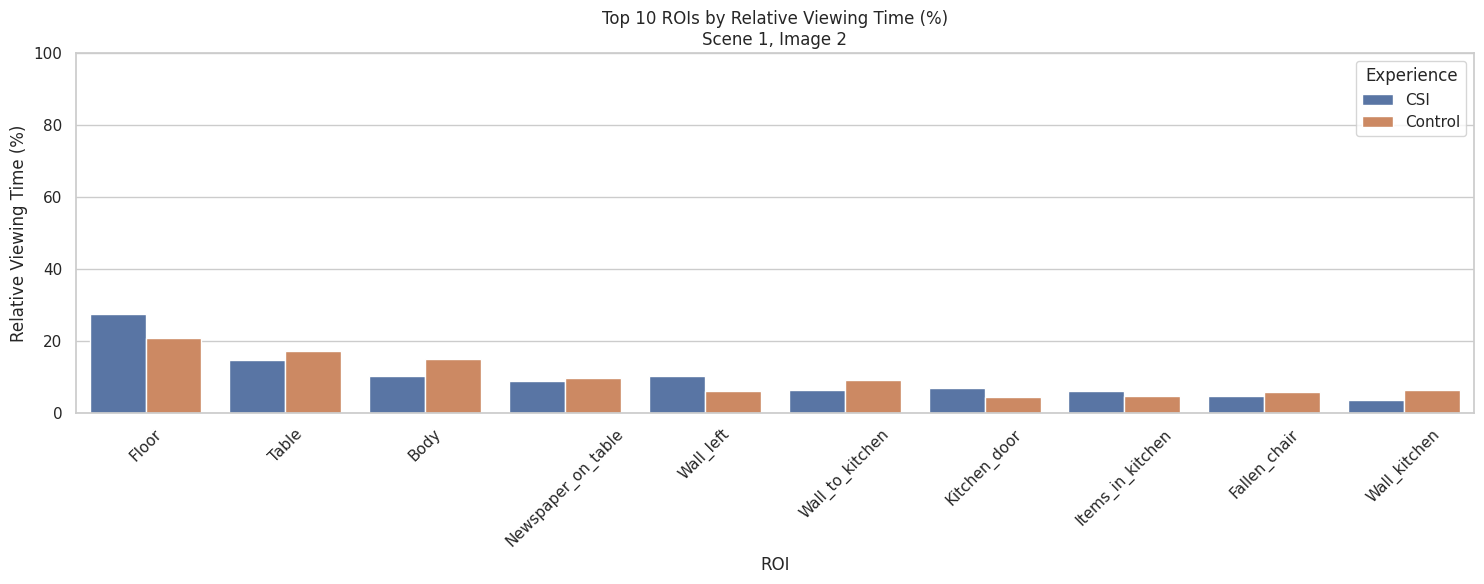

/tmp/ipykernel_8715/1172994509.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['TotalViewTimePercent'] = filtered_data.groupby('experience')['TotalViewTime'].transform(


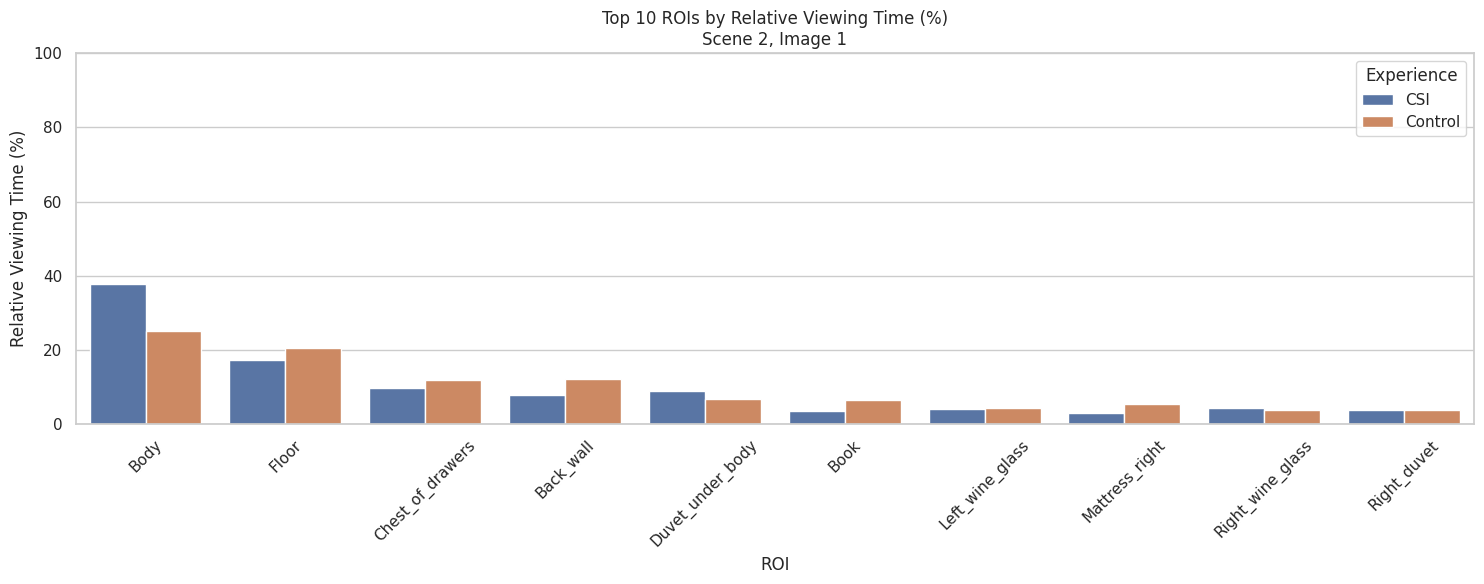

/tmp/ipykernel_8715/1172994509.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['TotalViewTimePercent'] = filtered_data.groupby('experience')['TotalViewTime'].transform(


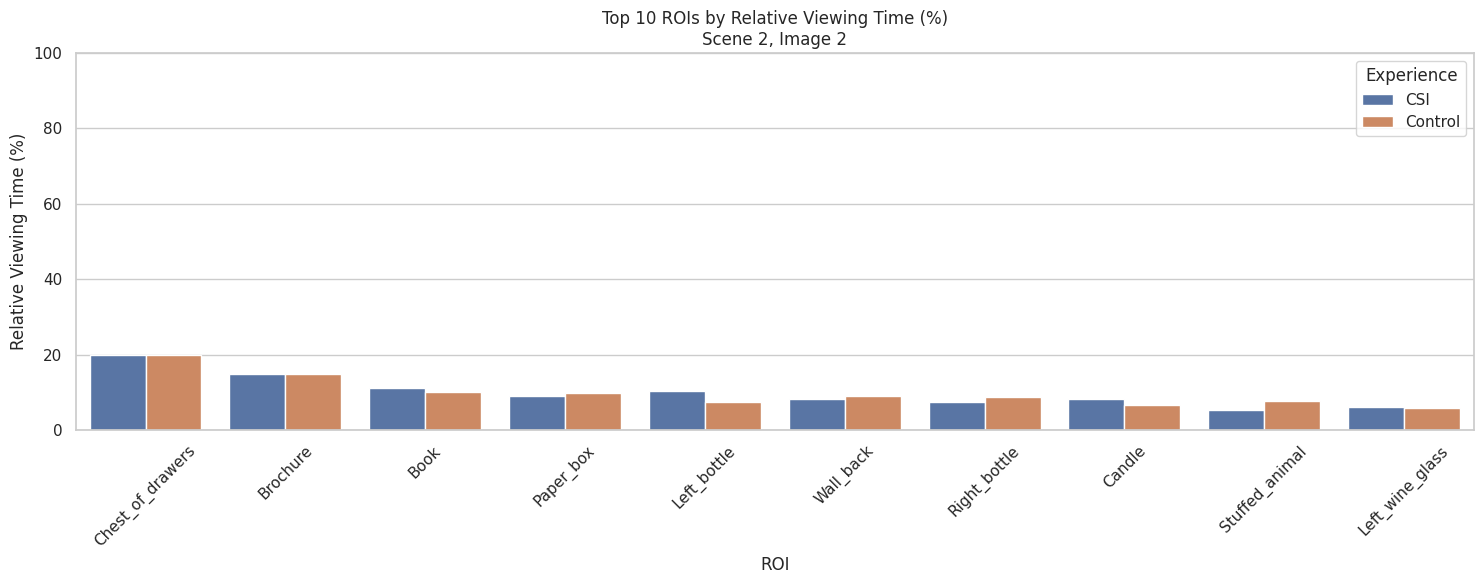

/tmp/ipykernel_8715/1172994509.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['TotalViewTimePercent'] = filtered_data.groupby('experience')['TotalViewTime'].transform(


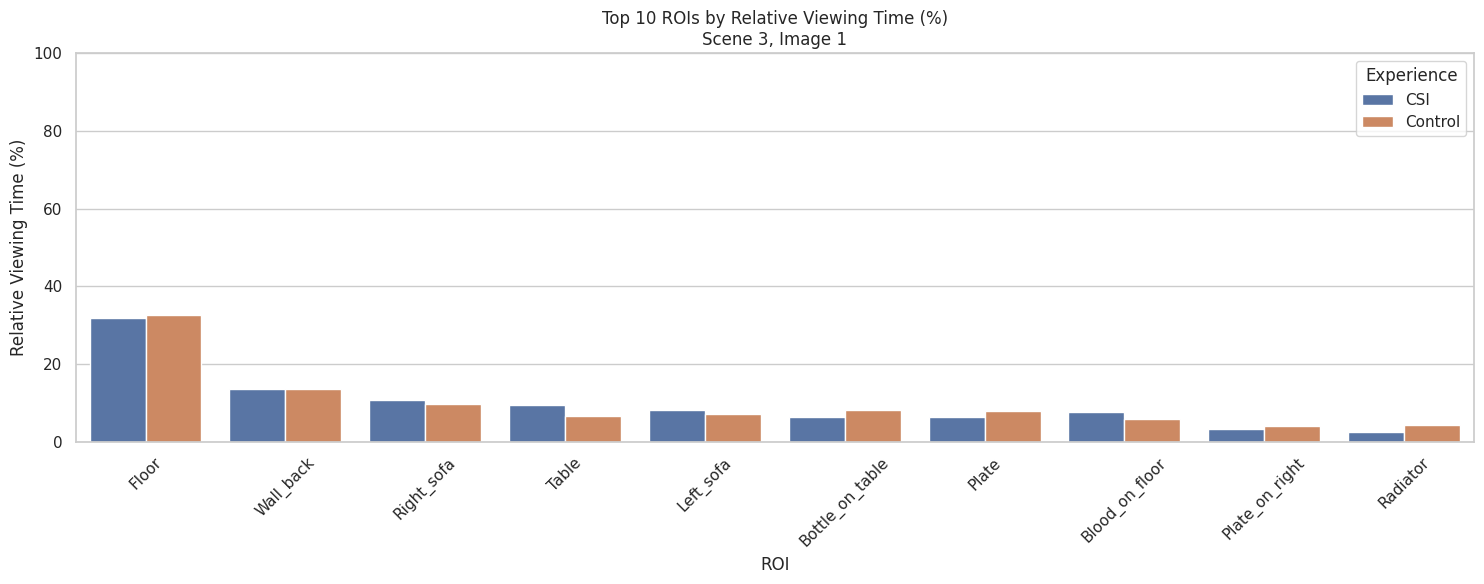

/tmp/ipykernel_8715/1172994509.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['TotalViewTimePercent'] = filtered_data.groupby('experience')['TotalViewTime'].transform(


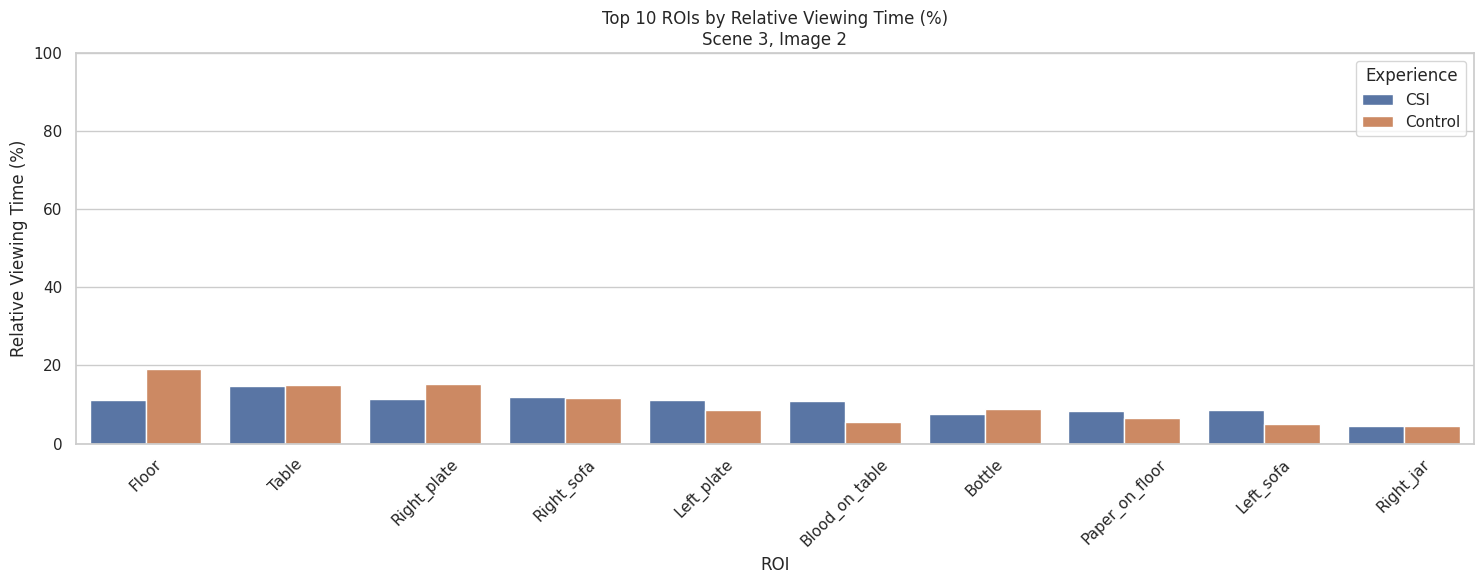

In [11]:
###### Loop through each scene and image combination
for scene in range(1, 4):  # Scenes 1 to 3
    for image in range(1, 3):  # Images 1 to 2

        # --- Step 0: Filter for current scene and image ---
        viewing_time_image_scene = viewing_times[
            (viewing_times['Scene'] == scene) & (viewing_times['Image'] == image)
        ]

        # --- Step 1: Group by experience and ROI (Name) ---
        avg_view_times = viewing_time_image_scene.groupby(['experience', 'Name'])['TotalViewTime'].mean().reset_index()

        # --- Step 2: Filter for only the desired experience groups ---
        selected_groups = ['Control', 'CSI']
        filtered_avg = avg_view_times[avg_view_times['experience'].isin(selected_groups)]

        # --- Step 3: Get top 10 ROIs based on average across the selected groups ---
        top_rois = (
            filtered_avg.groupby('Name')['TotalViewTime']
            .mean()
            .sort_values(ascending=False)
            .head(10)
            .index
        )

        # --- Step 4: Filter again to include only top 10 ROIs ---
        filtered_data = filtered_avg[filtered_avg['Name'].isin(top_rois)]

        # --- Step 5: Normalize to percentage within each experience group ---
        filtered_data['TotalViewTimePercent'] = filtered_data.groupby('experience')['TotalViewTime'].transform(
            lambda x: 100 * x / x.sum()
        )

        # --- Step 6: Plot ---
        sns.set(style="whitegrid")
        plt.figure(figsize=(15, 6))
        order = top_rois
        sns.barplot(data=filtered_data, x='Name', y='TotalViewTimePercent', hue='experience', order=order)

        plt.title(f'Top 10 ROIs by Relative Viewing Time (%)\nScene {scene}, Image {image}')
        plt.xlabel('ROI')
        plt.ylabel('Relative Viewing Time (%)')
        plt.xticks(rotation=45)
        plt.ylim(0, 100)
        plt.legend(title='Experience')

        plt.tight_layout()
        plt.show()
